In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.colwidth',150)

In [2]:

df = pd.read_csv('cleaned_firstaid_combind_allMethods.csv', encoding = "UTF-8")
df.head(20)


,SENTIMENT,REVIEW,REVIEW_punctuation,REVIEW_punctuation_tokenized,REVIEW_punctuation_tokenized_sw,REVIEW_punctuation_tokenized_sw_stemmed,REVIEW_punctuation_tokenized_sw_lemmatized
0,neutral,First aid,First aid,"['first', 'aid']","['first', 'aid']","['first', 'aid']","['first', 'aid']"
1,positive,A very useful tool.,A very useful tool,"['a', 'very', 'useful', 'tool']","['useful', 'tool']","['use', 'tool']","['useful', 'tool']"
2,negative,"Not at all helpful when almost all the advice for any issue is basically just ""call 911""",Not at all helpful when almost all the advice for any issue is basically just call 911,"['not', 'at', 'all', 'helpful', 'when', 'almost', 'all', 'the', 'advice', 'for', 'any', 'issue', 'is', 'basically', 'just', 'call', '911']","['helpful', 'almost', 'advice', 'issue', 'basically', 'call', '911']","['help', 'almost', 'advic', 'issu', 'basic', 'call', '911']","['helpful', 'almost', 'advice', 'issue', 'basically', 'call', '911']"
3,neutral,Very informative,Very informative,"['very', 'informative']",['informative'],['inform'],['informative']
4,positive,Nice,Nice,['nice'],['nice'],['nice'],['nice']
5,positive,Great app. Easy to use and very intuitive. Chocked full of easy to follow information.,Great app Easy to use and very intuitive Chocked full of easy to follow information,"['great', 'app', 'easy', 'to', 'use', 'and', 'very', 'intuitive', 'chocked', 'full', 'of', 'easy', 'to', 'follow', 'information']","['great', 'app', 'easy', 'use', 'intuitive', 'chocked', 'full', 'easy', 'follow', 'information']","['great', 'app', 'easi', 'use', 'intuit', 'chock', 'full', 'easi', 'follow', 'inform']","['great', 'app', 'easy', 'use', 'intuitive', 'chocked', 'full', 'easy', 'follow', 'information']"
6,positive,Amazing I love it very much thanx you really appreciate it,Amazing I love it very much thanx you really appreciate it,"['amazing', 'i', 'love', 'it', 'very', 'much', 'thanx', 'you', 'really', 'appreciate', 'it']","['amazing', 'love', 'much', 'thanx', 'really', 'appreciate']","['amaz', 'love', 'much', 'thanx', 'realli', 'appreci']","['amazing', 'love', 'much', 'thanx', 'really', 'appreciate']"
7,positive,"Several negatives: No search function I could find. Nothing on childbirth. Description says no ads, lots of ads (I don't mind the ads as much as t...",Several negatives No search function I could find Nothing on childbirth Description says no ads lots of ads I dont mind the ads as much as the fal...,"['several', 'negatives', 'no', 'search', 'function', 'i', 'could', 'find', 'nothing', 'on', 'childbirth', 'description', 'says', 'no', 'ads', 'lot...","['several', 'negatives', 'search', 'function', 'could', 'find', 'nothing', 'childbirth', 'description', 'says', 'ads', 'lots', 'ads', 'dont', 'min...","['sever', 'neg', 'search', 'function', 'could', 'find', 'noth', 'childbirth', 'descript', 'say', 'ad', 'lot', 'ad', 'dont', 'mind', 'ad', 'much', ...","['several', 'negative', 'search', 'function', 'could', 'find', 'nothing', 'childbirth', 'description', 'say', 'ad', 'lot', 'ad', 'dont', 'mind', '..."
8,positive,Great app! Very easy to understand. I recommended any person not trained in first aid or cpr to have this app.,Great app Very easy to understand I recommended any person not trained in first aid or cpr to have this app,"['great', 'app', 'very', 'easy', 'to', 'understand', 'i', 'recommended', 'any', 'person', 'not', 'trained', 'in', 'first', 'aid', 'or', 'cpr', 'to...","['great', 'app', 'easy', 'understand', 'recommended', 'person', 'trained', 'first', 'aid', 'cpr', 'app']","['great', 'app', 'easi', 'understand', 'recommend', 'person', 'train', 'first', 'aid', 'cpr', 'app']","['great', 'app', 'easy', 'understand', 'recommended', 'person', 'trained', 'first', 'aid', 'cpr', 'app']"
9,positive,Good to keep on hand to brush up on your first aid training.,Good to keep on hand to brush up on your first aid training,"['good', 'to', 'keep', 'on', 'hand', 'to', 'brush', 'up', 'on', 'your', 'first', 'aid', 'training']","

In [3]:
from collections import defaultdict
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
import nltk

In [4]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
neutralValues=defaultdict(int)

In [ ]:
# #I didnt use this function, because i already has tokenized the text
# def generate_N_grams(text,ngram=1):
#   words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
#   print("Sentence after removing stopwords:",words)
#   temp=zip(*[words[i:] for i in range(0,ngram)])
#   ans=[' '.join(ngram) for ngram in temp]
#   return ans

# Didnt use this code because i already has tokenized the txt
# for text in df[df.SENTIMENT=="positive"].REVIEW:
#   for word in generate_N_grams(text):
#     positiveValues[word]+=1

In [5]:
print(positiveValues)

defaultdict(<class 'int'>, {})


In [6]:
#the code is changed by me, because we already tokenized our data
for text in df[df.SENTIMENT=="positive"].REVIEW_punctuation_tokenized_sw_lemmatized:
    positiveValues[text]+=1

In [7]:
print(positiveValues)

defaultdict(<class 'int'>, {"['useful', 'tool']": 1, "['nice']": 9, "['great', 'app', 'easy', 'use', 'intuitive', 'chocked', 'full', 'easy', 'follow', 'information']": 1, "['amazing', 'love', 'much', 'thanx', 'really', 'appreciate']": 1, "['several', 'negative', 'search', 'function', 'could', 'find', 'nothing', 'childbirth', 'description', 'say', 'ad', 'lot', 'ad', 'dont', 'mind', 'ad', 'much', 'falsehood', 'font', 'readability', 'pretty', 'light', 'gray', 'white', 'much', 'text', 'info', 'ok', 'bit', 'verbose', 'there', 'better', 'apps', 'similar', 'stuff']": 1, "['great', 'app', 'easy', 'understand', 'recommended', 'person', 'trained', 'first', 'aid', 'cpr', 'app']": 1, "['good', 'keep', 'hand', 'brush', 'first', 'aid', 'training']": 1, "['useful', 'really', 'like', 'able', 'see', 'local', 'hospital', 'near']": 1, "['good', 'app', 'learned', 'lot']": 1, "['love']": 41, "['grandmother', 'nadine', 'worked', 'volunteer', 'red', 'cross', 'year', 'soo', 'thrilled', 'able', 'give', 'back',

In [8]:
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
print(df_positive)

                                                                                                                                                          0  \
0                                                                                                                                          ['great', 'app']   
1                                                                                                                                               ['helpful']   
2                                                                                                                                                  ['love']   
3                                                                                                                                                ['useful']   
4                                                                                                                                                 ['great']   
...                                           

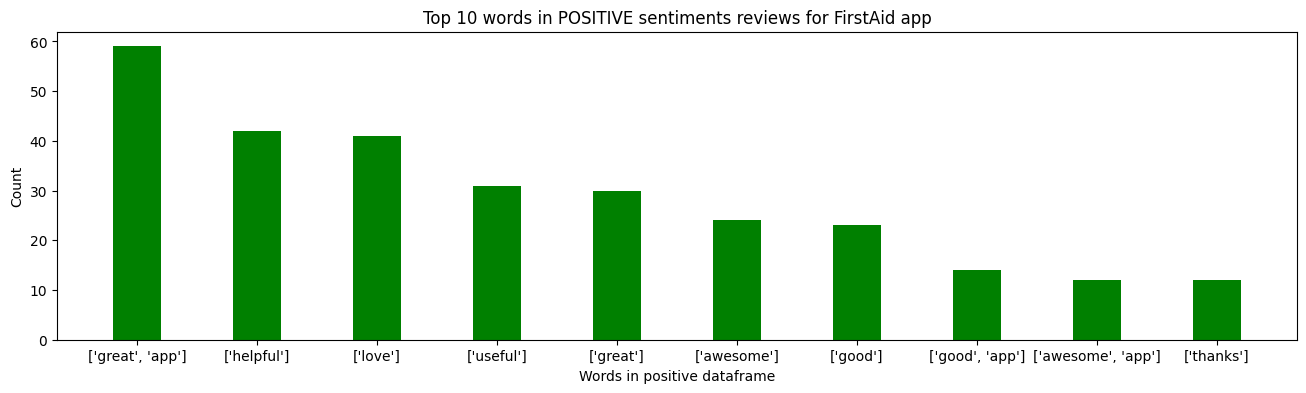

In [25]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]
plt.figure(0,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in POSITIVE sentiments reviews for FirstAid app")
plt.savefig("positive-FirstAid.png")
plt.show()

# Finding the most Used words in Negative Sentiment

In [16]:
negativeValues=defaultdict(int)
#the code is changed by me, because we already tokenized our data
for word in df[df.SENTIMENT=="negative"].REVIEW_punctuation_tokenized_sw_lemmatized:
    negativeValues[word]+=1

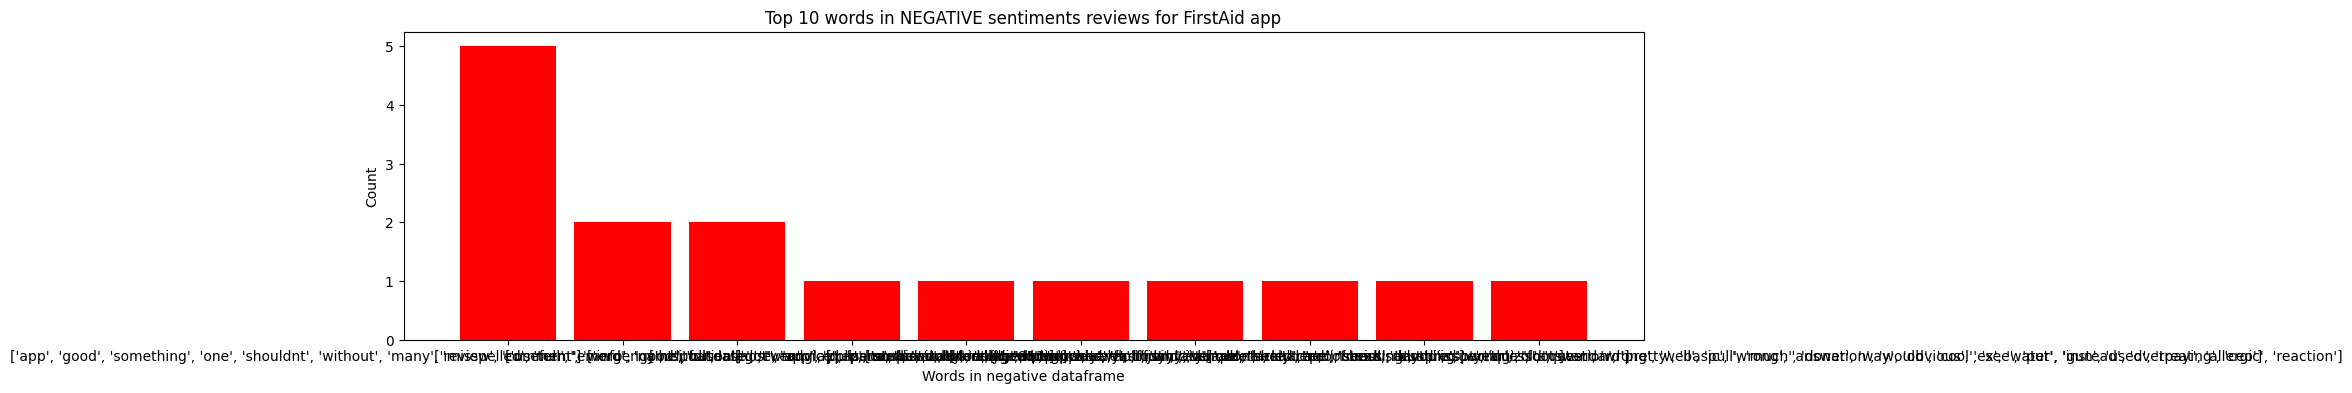

In [24]:
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.84)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in NEGATIVE sentiments reviews for FirstAid app")
plt.savefig("negative-firstaid.png")
plt.show()

# Finding the most Used words in NEUTRAL Sentiment

In [20]:
neutralValues=defaultdict(int)
#the code is changed by me, because we already tokenized our data
for word in df[df.SENTIMENT=="neutral"].REVIEW_punctuation_tokenized_sw_lemmatized:
    neutralValues[word]+=1

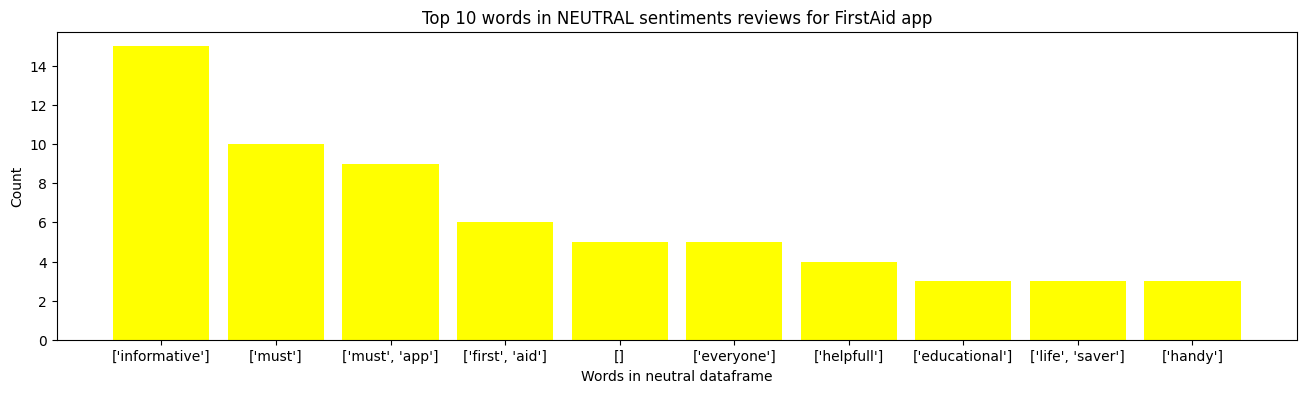

In [23]:
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))
ned1=df_neutral[0][:10]
ned2=df_neutral[1][:10]
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='yellow',
        width = 0.84)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in NEUTRAL sentiments reviews for FirstAid app")
plt.savefig("neutral-firstAid.png")
plt.show()

# Most used words overall

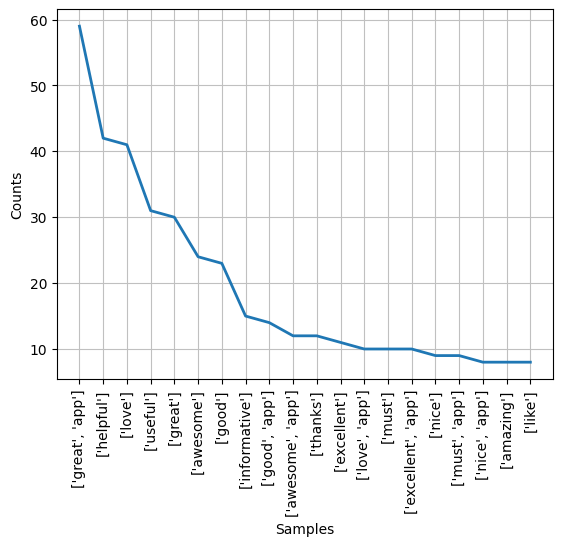

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [22]:
import nltk
import matplotlib.pyplot as plt
# import seaborn as sns

nlp_words = nltk.FreqDist(df['REVIEW_punctuation_tokenized_sw_lemmatized'])
nlp_words.plot(20)